In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('idf.csv')

In [3]:
df.head(5)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
df = df.dropna(subset=['total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold'])

In [9]:
df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y', errors='coerce')
df = df.dropna(subset=['week'])
df['week_num'] = df['week'].dt.isocalendar().week

In [10]:
X = df[['store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'week_num']]
y = df['units_sold']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 770.57
R^2 Score: 0.76


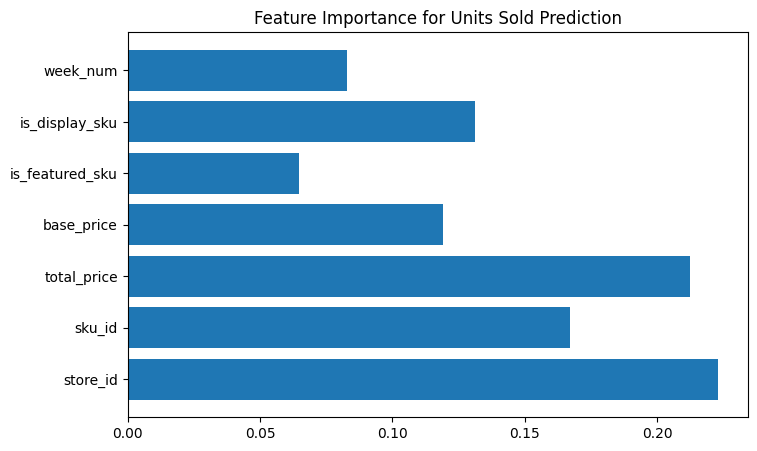

In [22]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance for Units Sold Prediction")
plt.show()

In [23]:
print("\nEnter details to predict weekly units sold:")

store_id = int(input("Store ID: "))
sku_id = int(input("SKU ID: "))
total_price = float(input("Total Price: "))
base_price = float(input("Base Price: "))
is_featured_sku = int(input("Is Featured SKU? (0=No,1=Yes): "))
is_display_sku = int(input("Is Display SKU? (0=No,1=Yes): "))
week_num = int(input("Week Number (1-52): "))

# Create input DataFrame
input_data = pd.DataFrame({
    'store_id':[store_id],
    'sku_id':[sku_id],
    'total_price':[total_price],
    'base_price':[base_price],
    'is_featured_sku':[is_featured_sku],
    'is_display_sku':[is_display_sku],
    'week_num':[week_num]
})



Enter details to predict weekly units sold:
Store ID: 8091
SKU ID: 216418	
Total Price: 99.037
Base Price: 111.862
Is Featured SKU? (0=No,1=Yes): 0
Is Display SKU? (0=No,1=Yes): 0
Week Number (1-52): 1


In [24]:
predicted_units = model.predict(input_data)[0]
restock_suggestion = int(predicted_units * 1.2)
print(f"\nPredicted Units Sold: {predicted_units:.0f}")
print(f"Suggested Restock Quantity (with 20% buffer): {restock_suggestion} units")


Predicted Units Sold: 25
Suggested Restock Quantity (with 20% buffer): 29 units


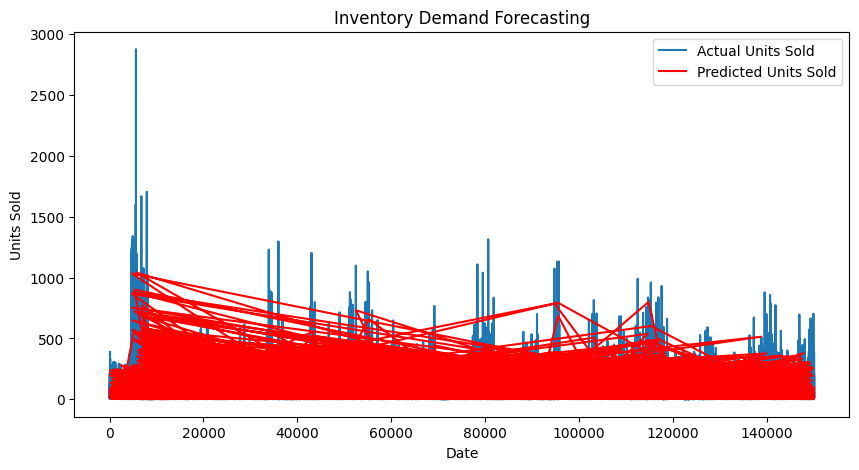

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['units_sold'], label='Actual Units Sold')
plt.plot(X_test.index, y_pred, label='Predicted Units Sold', color='red')
plt.title('Inventory Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


In [51]:
# Example: interactive future sales prediction and low-stock alerts

# Ask user for future days
n_days = int(input("Enter number of future days to predict: "))

# Ask user for SKU/store details
store_id = int(input("Store ID: "))
sku_id = int(input("SKU ID: "))
total_price = float(input("Total Price: "))
base_price = float(input("Base Price: "))
is_featured_sku = int(input("Is Featured SKU? (0=No, 1=Yes): "))
is_display_sku = int(input("Is Display SKU? (0=No, 1=Yes): "))
last_week_num = int(df['week_num'].max())

# Prepare future data with all features
future_data = pd.DataFrame({
    'store_id':[store_id]*n_days,
    'sku_id':[sku_id]*n_days,
    'total_price':[total_price]*n_days,
    'base_price':[base_price]*n_days,
    'is_featured_sku':[is_featured_sku]*n_days,
    'is_display_sku':[is_display_sku]*n_days,
    'week_num':[last_week_num + i for i in range(1, n_days+1)]
})

# Predict future units sold
future_sales_pred = lr_model.predict(future_data)

# Current stock
current_stock = df['Stock_Level'].iloc[-1]

# Calculate predicted stock for each future day
predicted_stock = current_stock - np.cumsum(future_sales_pred)

# Show predictions and low-stock alerts
print("\nPredicted future stock levels:")
for i, stock in enumerate(predicted_stock, 1):
    alert = " <-- Low Stock Alert!" if stock < 20 else ""
    print(f"Day {i}: {stock:.0f}{alert}")


Enter number of future days to predict: 20
Store ID: 8091
SKU ID: 216418
Total Price: 99.03
Base Price: 111.86
Is Featured SKU? (0=No, 1=Yes): 0
Is Display SKU? (0=No, 1=Yes): 0

Predicted future stock levels:
Day 1: -7758445 <-- Low Stock Alert!
Day 2: -7758509 <-- Low Stock Alert!
Day 3: -7758573 <-- Low Stock Alert!
Day 4: -7758637 <-- Low Stock Alert!
Day 5: -7758701 <-- Low Stock Alert!
Day 6: -7758766 <-- Low Stock Alert!
Day 7: -7758830 <-- Low Stock Alert!
Day 8: -7758894 <-- Low Stock Alert!
Day 9: -7758958 <-- Low Stock Alert!
Day 10: -7759022 <-- Low Stock Alert!
Day 11: -7759087 <-- Low Stock Alert!
Day 12: -7759151 <-- Low Stock Alert!
Day 13: -7759215 <-- Low Stock Alert!
Day 14: -7759279 <-- Low Stock Alert!
Day 15: -7759344 <-- Low Stock Alert!
Day 16: -7759408 <-- Low Stock Alert!
Day 17: -7759473 <-- Low Stock Alert!
Day 18: -7759537 <-- Low Stock Alert!
Day 19: -7759601 <-- Low Stock Alert!
Day 20: -7759666 <-- Low Stock Alert!


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA Forecast (Next 7 days):
150149    51.527738
150150    59.398347
150151    61.320826
150152    61.588262
150153    61.784544
150154    61.708793
150155    61.795596
Name: predicted_mean, dtype: float64


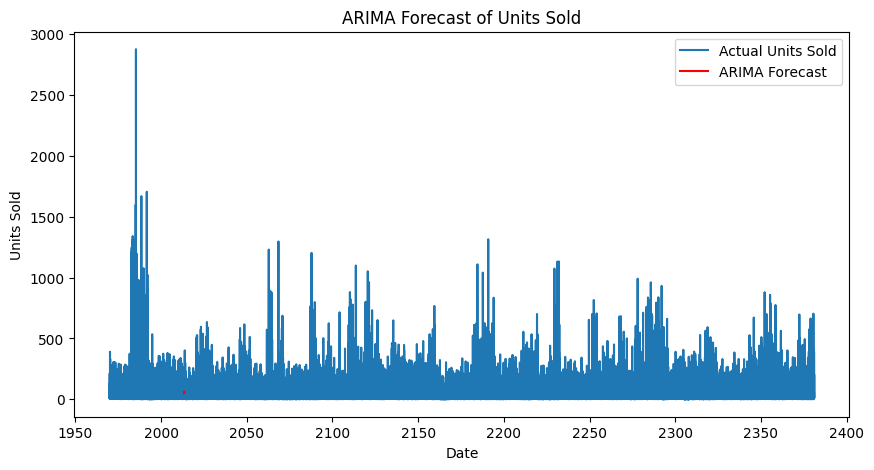

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA expects time series
ts = df['units_sold']

# Fit ARIMA model (order p,d,q)
arima_model = ARIMA(ts, order=(2,1,2))
arima_fit = arima_model.fit()

# Forecast next 7 days
arima_forecast = arima_fit.forecast(steps=7)
print("ARIMA Forecast (Next 7 days):")
print(arima_forecast)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label='Actual Units Sold') # Plotting with index and values
plt.plot(pd.date_range(start=df['week'].iloc[-1] + pd.Timedelta(days=1), periods=7),
         arima_forecast, color='red', label='ARIMA Forecast')
plt.title('ARIMA Forecast of Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()